<a href="https://colab.research.google.com/github/zachdaube/CS485/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS485 & CS584 - Homework 1**

In this Colab, we will explore and learn two packages: [NetworkX](https://networkx.org/documentation/stable/) and [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/), both of which are essential for conducting research on graph data.

We will begin by analyzing various graph statistics and properties using [NetworkX](https://networkx.org/documentation/stable/).

Then, we will introduce [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) to gain an initial understanding of PyG graph data.

**Please make a copy before you proceed.**


# NetworkX Tutorial

NetworkX is one of the most frequently used Python packages for creating, analyzing, and visualizing complex networks and graph structures.


## Setup

In [1]:
# Upgrade packages
!pip install --upgrade networkx
!pip install scipy==1.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
access 1.1.10.post3 requires scipy>=1.14.1, but you have scipy 1.13.0 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.0 which is incompatible.


In [2]:
# Import the NetworkX package
import networkx as nx

## Graph

NetworkX offers various classes for storing different types of graphs, including directed and undirected graphs. It also supports classes for creating multigraphs (both directed and undirected).

For more details, refer to the [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html). In this tutorial, we will focus on the most commonly used types: directed and undirected graphs.

In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [4]:
# Add two nodes with node level attributes one by one
G.add_node(0, feature="Node_0_features", label=1)
G.add_node(1, feature=[1, 20, 5], label=2)

# Get attributes of the node 0 and 1
node_0_attr = G.nodes[0]
node_1_attr = G.nodes[1]
print("Node 0 has the attributes {}".format(node_0_attr))
print("Node 1 has the attributes {}".format(node_1_attr))

Node 0 has the attributes {'feature': 'Node_0_features', 'label': 1}
Node 1 has the attributes {'feature': [1, 20, 5], 'label': 2}


In [5]:
# Add multiple nodes with attributes in a time
G.add_nodes_from([
  (2, {"feature": 2, "label": 1}),
  (3, {"feature": 3, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 'Node_0_features', 'label': 1})
(1, {'feature': [1, 20, 5], 'label': 2})
(2, {'feature': 2, 'label': 1})
(3, {'feature': 3, 'label': 2})
G has 4 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [6]:
# Add two edges with edge weight 0.5 and 0.6 one by one
G.add_edge(0, 1, weight=0.5)
G.add_edge(0, 2, weight=0.6)

# Get attributes of the edges
edge_0_1_attr = G.edges[(0, 1)]
edge_0_2_attr = G.edges[(0, 2)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))
print("Edge (0, 2) has the attributes {}".format(edge_0_2_attr))

Edge (0, 1) has the attributes {'weight': 0.5}
Edge (0, 2) has the attributes {'weight': 0.6}


In [7]:
# Add multiple edges with edge weights in a time
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 3, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
(2, 3)
G has 4 edges


## Visualization
NetworkX also provides tooling to conventiently visualize graphs.

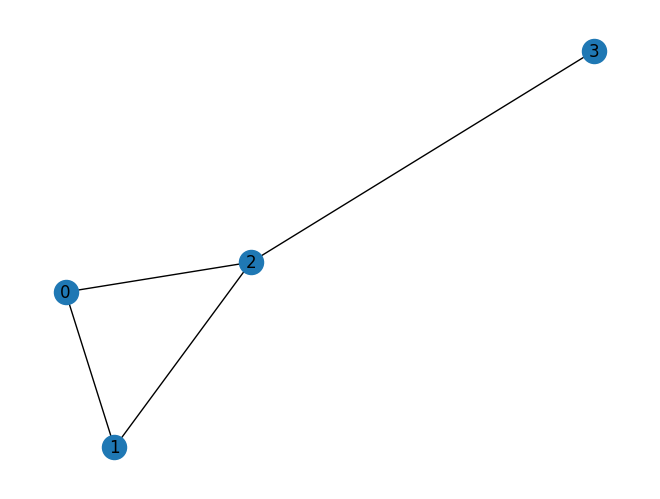

In [8]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [9]:
node_id = 2

# Degree of node 2
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 2
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 2 has degree 3
Node 2 has neighbor 0
Node 2 has neighbor 1
Node 2 has neighbor 3


## Documentation

You can explore more NetworkX functions through its [documentation](https://networkx.org/documentation/stable/).

## Question 1: Use the undirected graph class to construct a social network. (5 points)

Connectivity in a graph refers to the property that determines whether there is a path between any pair of nodes. A graph is considered connected if every node is reachable from every other node; otherwise, it is disconnected, consisting of two or more separate subgraphs.

In [10]:
import networkx as nx
from typing import List, Tuple

def construct_social_network(people: List[str], relationships: List[Tuple[str, str]]):
  # TODO: Implement the function that constructs a connected undirected graph
  # when a list of people and relatioships between them are given.
  # Let us build up our social network!

  social_network = nx.Graph()

  ############# Your code here ############

  #loop over people list, create node for each
  for person in people:
    social_network.add_node(person, label=person)

  #loop over the relation tuples, create undirected edge for each
  for person1, person2 in relationships:
    social_network.add_edge(person1, person2)

  #############################################

  return social_network

def is_friend(social_network, people_pair):
  # TODO: Implement the function that returns True or False
  # To indicates if two people are friend or not.
  # Hint: We may need to determine whether we can find an edge between them on the graph?

  to_be_friend = True

  ############# Your code here ############

  #friend if there exists edge between them
  #use has_edge function
  person1, person2 = people_pair
  to_be_friend = social_network.has_edge(person1, person2)
  #############################################

  return to_be_friend


# Let us Construct a social network that contains 10 people:
people = ["Bob", "Alice", "Charlie", "Diana", "Eve", "Frank", "Grace", "Hank", "Ivy", "Jack"]
relationships = [("Bob", "Alice"), ("Alice", "Charlie"), ("Charlie", "Diana"),
                 ("Diana", "Eve"), ("Eve", "Frank"), ("Frank", "Grace"),
                 ("Grace", "Hank"), ("Hank", "Ivy"), ("Hank", "Diana"), ("Ivy", "Jack")]
social_network = construct_social_network(people, relationships)

print(f"Are Bob and Eve are friend: {is_friend(social_network, ('Bob', 'Eve'))}")
print(f"Are Diana and Eve are friend: {is_friend(social_network, ('Diana', 'Eve'))}")


Are Bob and Eve are friend: False
Are Diana and Eve are friend: True


# PyTorch Geometric Tutorial

**[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)** is an extension library for PyTorch designed to facilitate the development of Graph Deep Learning models. It provides essential primitives, including various graph neural network layers and access to a large collection of benchmark datasets.

While NetworkX is a powerful tool for analyzing graph data, it is not specifically designed for deep learning on graphs. To bridge this gap, PyG extends the popular deep learning framework [PyTorch](https://pytorch.org/) with specialized utilities and methods for implementing Graph Neural Networks (GNNs) efficiently.

**[PyG](https://github.com/rusty1s/pytorch_geometric)** enables deep learning on graphs, a rapidly growing research area in the deep learning community. GNNs generalize classical deep learning concepts to work with irregularly structured data, such as graphs, allowing neural networks to reason about objects and their relationships effectively.

In this tutorial, we will first introduce the Graph Data as defined by PyG. The pipline of graph deep learning will be covered in detail in our upcoming lectures using PyG.


In [11]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.9.0+cpu


## Installing dependencies

Execute the cell below -- in case of issues, more information can be found on [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [12]:
# Install torch geometric
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.3 MB/s eta 0:00:00


## Dataset

PyG provides an easy access to the dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage. It integrates many widely used graph datasets for research, including Cora, PubMed, CiteSeer, and more.

In [13]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cuda.so
  import torch_geometric.typing


Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first can inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [14]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## Data


Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:

In [15]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

## Edge Index

Next we'll print the `edge_index` of our graph:

In [16]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We can see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathbb{V}| \times |\mathbb{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

To create a graph object using PyG, we use the `torch_geometric.data.Data` class, which requires at least an `edge_index`. For the simplest Data object, it must include at least an `edge_index` , which defines the connections between nodes.

In [17]:
from torch_geometric.data import Data
# For instance, we can generate a PyG graph in a random manner:
# Number of nodes and edges
num_nodes = 10
num_edges = 20

# Generate random edge connections
edge_index = torch.randint(0, num_nodes, (2, num_edges))

# Optionally, add random node features (e.g., 3 features per node)
x = torch.rand((num_nodes, 3))

# Create a PyG Data object
random_graph = Data(x=x, edge_index=edge_index)

print("Random PyG Graph:")
print(random_graph)

Random PyG Graph:
Data(x=[10, 3], edge_index=[2, 20])


## Question 2: Use the PyG Data class to construct the connected undirected social network with One-Hot Embedding. (5 points)

One-hot embedding, also known as one-hot encoding, is a representation technique used to convert categorical data into a numerical format that machine learning models can process. In this method, each unique category is represented as a binary vector, where:
* The length of the vector equals the total number of categories.
* The vector consists of all zeros except for a single position, which is marked as 1 to indicate the category's index.

For example, consider three categories: "Apple," "Banana," and "Cherry." Their one-hot representations would be:
* "Apple" → [1, 0, 0]
* "Banana" → [0, 1, 0]
* "Cherry" → [0, 0, 1]

NOTE: the direction of PyG graph is reflected by edge_index!

In [18]:
import torch
from torch_geometric.data import Data


def one_hot_embedding(people):
  # TODO: Implement one-hot encoding for the each node.
  one_hot_labels = []

  #assign an index to each (assuming they are unique)
  ############# Your code here ############
  n = len(people)

  for i, person in enumerate(people):
    vector = [0] * n
    vector[i] = 1
    one_hot_labels.append(vector)
  #############################################

  return one_hot_labels

def construct_pyg_social_network(people, relationships):
  # TODO: Implement the function that constructs a connected undirected graph using pyg
  # NOTE: the direction of PyG graph is reflected by edge_index!
  # (1, 2) is different from (2, 1)

  citation_graph = Data()

  ############# Your code here ############
  sources = []
  destinations = []
  nametoindex = {name: i for i, name in enumerate(people)}

  for p1, p2 in relationships:
    p1node = nametoindex[p1]
    p2node = nametoindex[p2]

    sources.append(p1node)
    sources.append(p2node)

    destinations.append(p2node)
    destinations.append(p1node)

  citation_graph.edge_index = torch.tensor([sources, destinations])
  #############################################

  citation_graph.x = torch.tensor(one_hot_embedding(people), dtype=torch.float)
  return citation_graph


# Let us Construct a social network that contains 10 people using pyg now!
people = ["Bob", "Alice", "Charlie", "Diana", "Eve", "Frank", "Grace", "Hank", "Ivy", "Jack"]
relationships = [("Bob", "Alice"), ("Alice", "Charlie"), ("Charlie", "Diana"),
                 ("Diana", "Eve"), ("Eve", "Frank"), ("Frank", "Grace"),
                 ("Grace", "Hank"), ("Hank", "Ivy"), ("Hank", "Diana"), ("Ivy", "Jack")]

citation_graph = construct_pyg_social_network(people, relationships)
print(f"One-hot embedding is ready: {torch.sum(citation_graph.x).item()/len(people)}")

One-hot embedding is ready: 1.0


## Documentation



You can explore more PyG functions through its [documentation](https://pytorch-geometric.readthedocs.io/en/latest/).

## Submission ##

When you submit your assignment, you will have to download this file as an `.ipynb` file.